## 0. Veri Setinin Hazırlanması

**Veri Seti ve Adresi:**

Jobs and Salaries in Data Science : https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

In [1]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Diğer örnek görselleştirme kütüphaneleri
# ggplot
# Bokeh
# Plotly

In [3]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/jobs-in-data/jobs_in_data.csv")
df = df_.copy()

In [4]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame: #rasgeleligi sabitlemek icin seed kullanilir
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1. Veriye İlk Bakış

In [5]:
# Veri setinin ilk 3 gözlemini görelim.
df.head(n = 3)

# Sondan 3 gözlem için tail() metodu kullanılabilir.
# df.tail(3)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023.0,Data DevOps Engineer,Data Engineering,EUR,88000.0,95012.0,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023.0,Data Architect,Data Architecture and Modeling,USD,186000.0,186000.0,United States,Senior,Full-time,In-person,United States,M
2,2023.0,Data Architect,Data Architecture and Modeling,USD,81800.0,81800.0,United States,Senior,Full-time,In-person,United States,M


Veri setindeki satır ve sütun sayılarını `.shape` kullanarak görebiliriz.

In [6]:
df.shape # -> (satır, sütun)

(9355, 12)

Veri setindeki değişkenlerin isimlerine erişmek istersek `df.columns` kullanabiliriz.

In [9]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['work_year', 'job_title', 'job_category', 'salary_currency', 'salary', 'salary_in_usd', 'employee_residence', 'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size'] 

Veri seti içerisinde toplam 12 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



`info()` metodunu kullanarak, veri setine ait yapısal bilgilere ulaşabiliriz.

Bu noktada elimizde kolonların veri tiplerinin doğru olup olmadığını, kayıt sayılarını, kolon isimlerini mutlaka kontrol etmeliyiz.

In [ ]:
df.info()

Sadece elimizdeki değişkenleri görmek ve tiplerini görüntülemek istersek, `dtypes` kullanabiliriz.

In [ ]:
df.dtypes

Elimizdeki veri setinde kategorik ve numerik özellikler birlikte bulunmakta. Bu özellikleri ayırmak ve farklı değişken listelerinde kullanmak bizim için faydalı olabilir, özellikle kolon bazlı işlemler yapmak istersek bu listeleri bir filtre olarak kullanabiliriz.

**UYARI !**: Veri setinin ham halinde, kolonların veri tipleri her zaman olması gerektiği haliyle olmayabilir. Kategorik ve numerik kolonları ayırırken öncelikle her değişkenin doğru veri tipinde olduğundan emin olmalısınız.

In [ ]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

# ALIŞTIRMA: List comprehension nasıl kullanılır öğrenin ve yukarıdaki listeleri bu yapıyı kullanarak oluşturmaya çalışın.

In [ ]:
categorical_features, numerical_features

Örneğin, veri tipi Object olan kategorik değişkenlerin veri tipini Categorical olarak değiştirmek istersek, basitçe kolon isimleri üzerinde bir döngü kurarak filtreleme yapabiliriz.

Döngü içerisinde, mevcut kolon ismi categorical_features içerisinde bulunuyorsa, o zaman o kolonun tipini Categorical olarak değiştirelim, bulunmuyorsa bir işlem yapmayalım.

In [ ]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [ ]:
df.info()

In [ ]:
df['company_size'][:3]

Veri setimizin betimsel istatistiklerine ulaşmak için `describe()` fonksiyonunu kullanıyoruz.

Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.

In [ ]:
df.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

# df.describe(include = "all") -> Veri setindeki tüm değişkenleri dahil etmek için include parametresine "all" değerini verebilirsiniz.

## 2. Eksik Veri Analizi

Eksik Veri Analizi ile, veri setimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi hedefleriz.

Veri seti içerisinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

Eksik veriler, duruma bağlı olarak veri setinden silinebilir veya uygun veriler ile doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlar içerisinde yer alan diğer verilerin kaybedilmesi anlamına gelir. Eksik verilerin doldurulması işleminde ise, veri setine sentetik bir girdi yapacağımızdan dolayı, doldurma işlemleri veri setindeki dağılımları manipüle edebilir (veri setinde yanlılık oluşturabilir).

Eksik verilerin ne sebeple ortaya çıktığı hassas bir şekilde değerlendirilmeli, nasıl ele alınacağı da bu değerlendirme sonucunda uygun şekilde karar verilmelidir.

### 2.1 Eksik Verilerin Gözlemlenmesi

In [ ]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

# ALIŞTIRMA: Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu bulunuz.

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [ ]:
df.isna().sum().sum()

In [ ]:
# Eksik olmayan değerlerin sayısı
df.notnull().sum()

**None ve NaN değerler arasındaki fark nedir?**

`None` (null) değerler ile `NaN` değerler arasındaki farkın ne olduğunu görmek için güzel bir kaynak: https://medium.com/@allenhuang1996/whats-the-difference-between-null-and-nan-in-python-a1af20d523ce

In [ ]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

In [ ]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

In [ ]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

In [ ]:
#!pip install missingno -> missingno kütüphanesini kullanabilmek için öncelikle yüklemeniz lazım.
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

In [ ]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['salary', 'salary_in_usd']],
            figsize = (10, 6),
            fontsize = 10);

In [ ]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

### 2.2 Yöntem 1: Eksik Verilerin Silinmesi

Veri setinde bulunan eksik verilere müdahale yöntemlerinden birisi, eksik verilerin silinmesidir. Uygulaması oldukça kolay bir yöntem olsa da eksik verileri silmeden önce dikkat edilmesi gereken önemli hususlar vardır.

1. Eksik bir verinin bulunduğu gözlemi silmeya karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir.
   
2. Eksik veriler veri setinde kayda değer bir yüzdeyi oluşturuyorsa, eksik verilerin silinmesi durumunda veri setindeki birçok gözlemi kaybedeceğimiz unutulmamalıdır. Bu durumda veri seti içerisinde bize bilgi sağlayabilecek birçok veriyi de kaybetmiş olacağız. Verinin olabildiğince fazla olması, hem analitik yöntemler hem de makine öğrenmesi yöntemleri için oldukça önemli olduğuna göre, veri setinden olabildiğince az kayıp verecek yöntemler denemeliyiz.

In [ ]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df.dropna(inplace = False)[:5]
#df = df.dropna()

In [ ]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df.dropna(how = 'all')[:5]

In [ ]:
# Değişken bazında silmek için;
df.dropna(axis = 1)

### 2.3 Yöntem 2: Eksik Verilerin Doldurulması

Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [ ]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

In [ ]:
df_fillna.isna().sum()

#### 2.3.1 Sayısal Değişkenlerin Doldurulması

In [ ]:
# Numerik bir değişkenin mean değeriyle doldurulması
mean_salary = df_fillna['salary'].mean()

df_fillna['salary'].fillna(value = mean_salary, inplace = True)

df_fillna.isna().sum()

In [ ]:
# Doldurma işleminin döngüyle yapılması
to_be_filled = numerical_features[1:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

In [ ]:
df_fillna.isna().sum()

In [ ]:
df.describe().T

Doldurma işlemini mean yerine median değer ile de gerçekleştirebiliriz, ancak bunu kuyruklu (skewed) dağılımlarda yapmayı tercih ediyoruz.

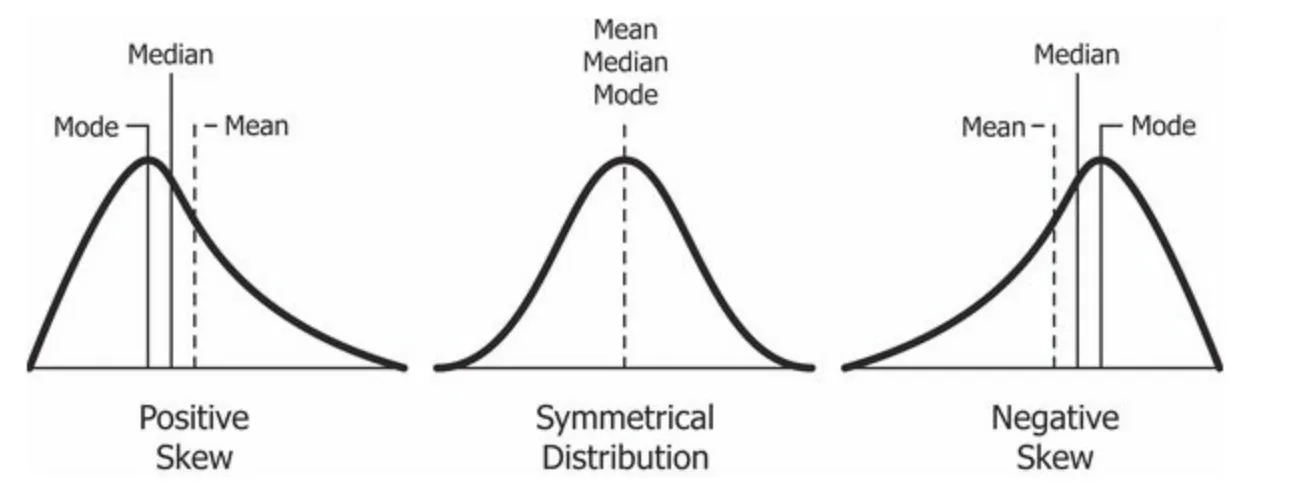

In [ ]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['salary'])
plt.show()

#### 2.3.2 Kategorik Değişkenlerin Doldurulması

In [ ]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['work_setting'].isna().sum()

# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['work_setting'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['work_setting'] = df_fillna['work_setting'].fillna(value = work_setting_mode[0])

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

In [ ]:
df_fillna[["job_category"]][:20]

In [ ]:
# Önceki değer ile doldurma işlemi
df_fillna["job_category"].fillna(method = "bfill")

In [ ]:
# Sonraki değer ile doldurma işlemi
df_fillna["job_category"].fillna(method = "ffill")

#### 2.3.3 Kategorik Kırılım İle Doldurma İşlemi

Burada basitçe mean ve median değerler ile doldurma işlemi yapmış olsak da, eksik veri durumunu bu kadar basit bir şekilde ele almak her zaman doğru olmayacaktır. Bu tarz basit doldurma işlemleri hızlı bir çözüm olarak ele alınmalıdır. Daha analitik bir yaklaşım için veri içerisinde benzetimler uygulayarak doldurma işlemlerini buna göre gerçekleştirebiliriz.

Örneğin elimizdeki salary kolonunu basitçe mean değer ile doldurmuştuk. Ancak biz biliyoruz ki elimizde job_title isimli bir kolon var ve bu kolonda farklı pozisyonlar yer almakta. Bu durumda örneğin Data Engineer pozisyonuna ait eksik bir maaş verisini, veri setimizdeki Data Engineer pozisyonlarına ait maaşların ortalama (veya median) değeriyle doldurmamız daha doğru bir yaklaşım olacaktır. Çünkü farklı pozisyonların farklı maaş ortalamaları olacağı için, eksik maaş verisini o kaydın ait olduğu grubun istatistiksel değerine göre doldurmak daha doğrudur.

In [ ]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

In [ ]:
# Bu kodun ne yaptığını kodu çalıştırarak keşfedin.

#job_title_mean_salary_df = df_categorical_fillna.groupby("job_title", observed = False)["salary"].mean().to_frame()

In [ ]:
df_categorical_fillna["salary"].fillna(value = df_categorical_fillna.groupby("job_title")["salary"].transform("mean"),
                                       inplace = True)

In [ ]:
df_categorical_fillna.isna().sum()

In [ ]:
df_categorical_fillna[df_categorical_fillna[["job_title", "salary"]].isna().all(axis=1)][["job_title", "salary"]]


In [ ]:
df_categorical_fillna[df_categorical_fillna['salary'].isnull()]

#### 2.3.4 Makine Öğrenmesi ile Değer Atama Teknikleri

Makine öğrenmesi yöntemleri kullanarak da eksik verileri doldurmak mümkündür. Makine Öğrenmesi modelleri bu bootcamp'in konusu olmadığı için detaylı bir anlatım gerçekleştirilmeyecektir.

**Hangi yöntemler kullanılabilir?**:
- KNNImputer (K-Nearest Neighbor)
- Random Forest Classifier

Google -> "How can I fill missing values by using Machine Learning techniques in Python?", "Python ile eksik verileri Makine Öğrenmesi teknikleri kullanarak nasıl doldurabilirim?"

## 3. Kategorik Değişken Analizi

In [ ]:
df = df_.copy()
df.info()

### 3.1 Kategorik Değişken İşlemleri

In [ ]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanabiliriz.
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

In [ ]:
# Kategorik bir değişkendeki benzersiz değerleri gözlemlemek için unique() kullanabiliriz.
df_categorical["salary_currency"].unique()

In [ ]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısını görebilmek için nunique() kullanabiliriz.
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

In [ ]:
# Her bir kategorik değişken için toplam gözlem sayısını value_counts() ile buluyoruz.
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

In [ ]:
# Kategorik bir değişkende bulunan kategorik değerleri bir liste haline getirip sonra kullanabiliriz.
comp_categories = df["company_size"].unique().tolist()[::-1]
comp_categories

In [ ]:
# Ordinal değişken nasıl oluşturulur?
from pandas.api.types import CategoricalDtype

df["company_size"] = df["company_size"].astype(CategoricalDtype(categories = comp_categories, ordered = True))

# ALIŞTIRMA: astype('category') ile CategoricalDtype arasında fark var mıdır? Varsa nedir? Araştırın.

In [ ]:
df["company_size"].head()

### 3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

In [ ]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.
df['job_category'].value_counts().plot.barh();

In [ ]:
sns.countplot(data = df,
              y = "job_category",
              hue = "job_category",
              order = df["job_category"].value_counts().index,
              palette = "Set1");

In [ ]:
sns.barplot(data = df, x = "company_size", y = df.company_size.index);

In [ ]:
sns.catplot(data = df,
            x = "experience_level",
            y = "salary_in_usd");

In [ ]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "experience_level",
            y = "salary_in_usd",
            hue = "job_category");

### 3.3 Kategorik Gruplama (groupby) İşlemleri

In [ ]:
df.head()

**Soru:** Dolar kuru bazında ortalama en çok kazanç elde eden iş kategorisi hangisi?

In [ ]:
df_usd = df.groupby(by = "job_category")["salary_in_usd"].mean().to_frame().reset_index().sort_values(by = "salary_in_usd", ascending = False)

df_usd

In [ ]:
df.groupby(by = ['job_category', 'work_setting'])['salary_in_usd'].mean().to_frame().reset_index().sort_values(by = "salary_in_usd", ascending = False)[:5]

In [ ]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "job_category", y = "salary_in_usd", hue = "work_setting");

**Soru:** Herhangi bir ülke için, iş kategorisi bazında kaç adet kayıt var?

In [ ]:
df_location = df.groupby(by = "company_location")["job_category"].value_counts().to_frame().reset_index().sort_values(by = "count", ascending = False)
df_location_usa = df_location[df_location['company_location'] == "Germany"]
df_location_usa

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(data = df_location_usa, x = "company_location", y = 'count', hue = "job_category");

# ALIŞTIRMA: Bu yaptığımız işlemi bir fonksiyon haline getirin, bu fonksiyon kendi içinde yukarıdaki gruplama işlemini yaparak argüman olarak verilen ülke
#            ismine göre aşağıdaki grafiği oluşturmalıdır.

## 4. Sürekli Değişken Analizi

### 4.1 Sürekli Değişkenlerin İncelenmesi

In [ ]:
# Veri setindeki numerik kolonları seçmek için aşağıdaki yapıyı kullanabiliriz.
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

In [ ]:
df_numerical.describe().T

In [ ]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def give_stats(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [ ]:
give_stats(dataframe = df)

In [ ]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df, x = "salary_in_usd", kde = True, hue = "work_setting");

In [ ]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['salary_in_usd'], fill = True);

In [ ]:
# FacetGrid kullanarak kategorik kırılımda yoğunluk gözlemleyebiliriz.
sns.FacetGrid(data = df,
              hue = "work_setting",
              height = 7,
              xlim = (0, 400000)).map(sns.kdeplot, "salary_in_usd", fill = True).add_legend();

In [ ]:
# Catplot ile numerik bir değişkenin kategorik bazda ve kırılımdaki dağılımını görebiliriz.
plt.figure(figsize = (12, 8))
sns.catplot(data = df, x = "work_setting", y = "salary_in_usd", hue = "company_size", kind = "point");

In [ ]:
# Boxplot kategorik olarak numerik dağılımı gösterir, çeyreklik değerler ve IQR'a göre aykırı değerler de boxplot ile gözlemlenebilir.
sns.boxplot(data = df,
            x = "work_setting",
            y = "salary_in_usd",
            hue = "company_size");

In [ ]:
# Farklı numerik görselleştirme işlemleri için iris veri setini yükleyelim.
iris = sns.load_dataset(name = "iris")
iris[:3]

In [ ]:
# pairplot numerik değişkenler arasındaki saçılım ve yoğunluk ilişkilerini gösterir.
sns.pairplot(data = iris, hue = "species");

In [ ]:
# Scatter Plot, numerik değişkenler arasındaki saçılım ilişkisini gösterir.
sns.scatterplot(data = iris,
                x = "sepal_width",
                y = "sepal_length",
                hue = "species");

In [ ]:
# Heatmap ise corr() (korelasyon) methodu ile kullanıldığında numerik değerler arasındaki ilişki kuvvetini gösterir.
plt.figure(figsize = (10, 7))
sns.heatmap(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot = True, cmap = "coolwarm");

In [ ]:
# Çizgi grafik ile numerik değişkenlerin tarihsel olarak değişimini gözlemleyebiliriz.
plt.figure(figsize = (10, 8))
sns.lineplot(data = df,
             x = "work_year",
             y = "salary_in_usd",
             hue = "work_setting");

# ALIŞTIRMA: lineplot içerisinde çizginin etrafındaki yarı saydam alanların neyi ifade ettiğini araştırın.

## 5. Aykırı Değer Analizi (Outliers)

Aykırı değerlerin analizi de tıpkı eksik verilerde olduğu gibi hassasiyetle değerlendirilmelidir. Aykırı değerlerin varlığı veri setindeki dağılımları etkileyeceği için, aykırı değere sahip bir veri setiyle tahmin modeli oluşturduğumuzda modelimizin genellenebilirliğinin düşmesine sebep olacaktır.

Aykırı değerlerin değerlendirilmesi için sektörel bilgi, standart sapma yaklaşımı, Z-skoru, IQR yöntemi gibi yöntemler kullanılabilir. Biz burada IQR yöntemi ile basitçe bir düzeltme işlemi uygulayacağız.

In [ ]:
df = df_.copy()

In [ ]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["salary_in_usd"],
            orient = "v");

In [ ]:
df_salary_in_usd = df['salary_in_usd']
df_salary_in_usd

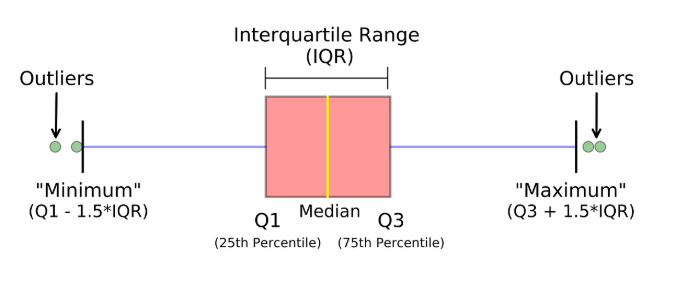

In [ ]:
# Quantile değerlerin belirlenmesi.
Q1 = df_salary_in_usd.quantile(0.25)
Q3 = df_salary_in_usd.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR


In [ ]:
# Upper_fence üzerinde kalan aykırı gözlemlerin index değerlerini, daha sonra kullanmak üzere bir değişkende tutabiliriz.
outlier_idx = df_salary_in_usd[df_salary_in_usd > upper_fence].index

outlier_idx

In [ ]:
df_salary_in_usd[df_salary_in_usd > upper_fence]

### 5.1 Aykırı Gözlemlerin Silinmesi

In [ ]:
df_del = df[~(df_salary_in_usd > upper_fence)]

df_del

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df_del["salary_in_usd"],
            orient = "v");

### 5.2 Aykırı Gözlemlerin Doldurulması

#### 5.2.1 Ortalama Değer İle Doldurma

In [ ]:
df.loc[df_salary_in_usd > upper_fence, "salary_in_usd"] = df_salary_in_usd.mean()

In [ ]:
df.loc[df_salary_in_usd > upper_fence, "salary_in_usd"]

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["salary_in_usd"],
            orient = "v");

#### 5.2.2 Baskılama Yöntemi

In [ ]:
df = df_.copy()

In [ ]:
df.loc[df_salary_in_usd > upper_fence, "salary_in_usd"] = upper_fence

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["salary_in_usd"],
            orient = "v");

Bunlar ek olarak aşağıdaki yöntemleri inceleyebilirsiniz:

- Local Outlier Factor

## 6. Feature Engineering

Bu bölümde veri setindeki özellikleri kullanarak ne tür özellikler türetebileceğimize ilişkin örnekler göreceğiz.

In [ ]:
df.head()

In [ ]:
# USD bazında maaş tutarlarına göre maaş segmentasyonu oluşturabiliriz.

def salary_range(salary):
    if salary < 80000:
        return 'Low'
    elif 80000 <= salary <= 150000:
        return 'Medium'
    else:
        return 'High'

df['salary_range'] = df['salary_in_usd'].apply(salary_range)

df.head(3)

In [ ]:
# Çalışanın kendi ülkesinde mi yoksa başka ülkede mi çalıştığının bilgisini çıkarabiliriz.
df['is_international'] = df.apply(lambda row: True if row['employee_residence'] != row['company_location'] else False, axis=1)

df[df['is_international'] == True]

# ALIŞTIRMA: company_location değişkeninde bulunan ülkeleri bulundukları kıtalarla eşleştirecek bir fonksiyon yazmayı deneyebilirsiniz.